# 🚢 Titanic Prediction

This Jupyter Notebook is designed to predict the survival of passengers aboard the Titanic using random forest techniques. 

The dataset used for this analysis is sourced from the Kaggle Titanic Competition: https://www.kaggle.com/competitions/titanic


## 📚 Library Import 

Firstly, we import all the library we need for this project

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

## 📝 Input and Benchmarking

In this section, I set up a benchmark model that uses basic features from the input data. This helps establish a baseline for comparison as we explore more complex models later on.

### Read Dataset

In [70]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the table above, we can see the basic data type of the features in the data. At the same time, there are missing value in Age, Cabin, Fare which needs more actions in the engineering session.


In [73]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [74]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Benchmarking Model

In [75]:
def benchmark(X_input):

    #Features dropped in the benchmark model:
    X_input = X_input.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
    
    #The missing value in Fare has been filled:
    X_input['Fare'].fillna(X_input['Fare'].mean(), inplace=True)
    
    #The missing value in Age in filled with mean:
    X_input['Age'].fillna(X_input['Age'].mean(), inplace=True)
    
    #Sex has been turned into one-hot format:
    X_input = pd.get_dummies(X_input, columns=['Sex'], drop_first=False)
    
    #The missing value in Embarked has been filled by the most frequent value:
    most_frequent_embarked = X_input['Embarked'].mode()[0]
    X_input['Embarked'].fillna(most_frequent_embarked, inplace=True)
    X_input = pd.get_dummies(X_input, columns=['Embarked'], drop_first=False)    
    
    return(X_input)

In [76]:
y_train = train_data['Survived']

X_Base_train=benchmark(train_data)
X_Base_train=X_Base_train.drop(columns=['Survived'])
X_Base_test=benchmark(test_data)

print("This is the result of benchmark model:")
benchmark_models,benchmark_result=train_RF(X_Base_train,y_train)


This is the result of benchmark model:
    mean_test_score  std_test_score  \
91         0.832838        0.013228   
68         0.832838        0.016558   
38         0.831429        0.018623   
11         0.830040        0.020222   
99         0.830040        0.013073   

                                               params  rank_test_score  
91  {'n_estimators': 150, 'min_samples_split': 2, ...                1  
68  {'n_estimators': 100, 'min_samples_split': 2, ...                1  
38  {'n_estimators': 100, 'min_samples_split': 5, ...                3  
11  {'n_estimators': 100, 'min_samples_split': 10,...                4  
99  {'n_estimators': 50, 'min_samples_split': 10, ...                5  


83% is a solid result! 🎉 Now, let's dive deeper into data exploration and feature engineering to see if we can improve even further.

## 🔍  Data Exploration and Feature Engineering

### 👑 Name - Title

In this section, we extract the title from the Name column in the dataset, which can provide insights into passenger demographics and potentially improve our prediction model.

In the code below, we use the apply() function along with a lambda function to extract the title from the Name column. The split() method is used to break the name string at the comma and period, and strip() removes any extra spaces.

In [77]:
# We filter out the title from the Name column
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [78]:
print(train_data['Title'].unique())
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


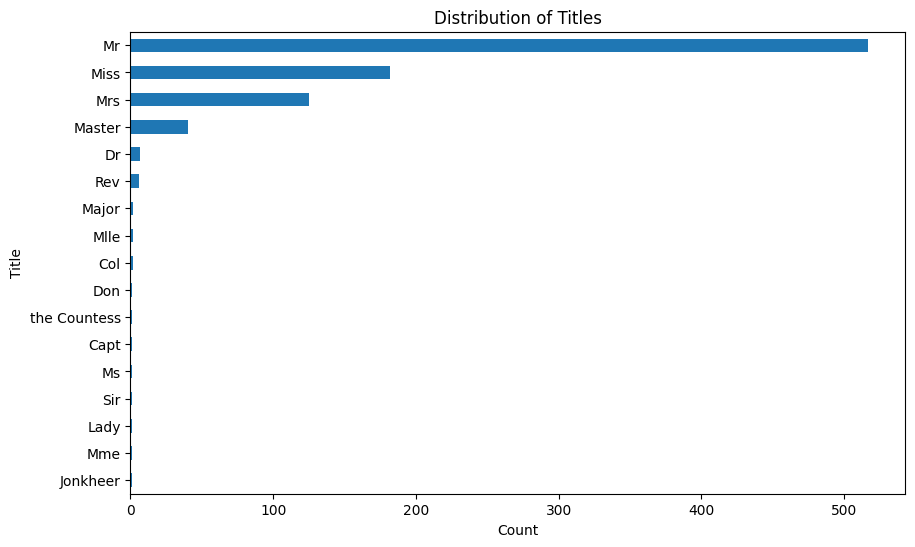

In [79]:
plt.figure(figsize=(10, 6))
train_data['Title'].value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

From the bar chart above, it is noted that the counts for some titles are quite similar, suggesting that these titles might need to be combined for better clarity and analysis. Hence, the following mapping is applied to reduce the number of unique titles, simplifying the dataset and enhancing the effectiveness of our analysis and modeling. Only Miss, Mrs,Mr and Rare have been kept.

In [80]:
def get_titles(title):
    if title in ['Mme', 'Ms', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'the Countess']:
        return 'Miss'
    elif title in ['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir','Master']:
        return 'Rare'
    else:
        return title

In [81]:
train_data['Title_Combined'] = train_data['Title'].apply(get_titles)
test_data['Title_Combined'] = test_data['Title'].apply(get_titles)

In [82]:

X_train = pd.concat([X_Base_train, train_data[['Title_Combined']]], axis=1)
X_train = pd.get_dummies(X_train, columns=['Title_Combined'], drop_first=False)

X_test = pd.concat([X_Base_test, test_data[['Title_Combined']]], axis=1)
X_test = pd.get_dummies(X_test, columns=['Title_Combined'], drop_first=False)

print("This is the new result with title added:")

benchmark_models, benchmark_result = train_RF(X_train, y_train)


This is the new result with title added:
    mean_test_score  std_test_score  \
42         0.832897        0.018215   
83         0.831469        0.013224   
95         0.831419        0.018694   
4          0.830070        0.011853   
20         0.830070        0.014855   

                                               params  rank_test_score  
42  {'n_estimators': 50, 'min_samples_split': 2, '...                1  
83  {'n_estimators': 100, 'min_samples_split': 10,...                2  
95  {'n_estimators': 100, 'min_samples_split': 5, ...                3  
4   {'n_estimators': 150, 'min_samples_split': 2, ...                4  
20  {'n_estimators': 150, 'min_samples_split': 5, ...                4  


### 👶Age

The survival rate can be related to age, as young children might have a higher chance of being rescued. Let’s explore how age affects the survival rate deeper. 📊

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(col_x,key):
 sns.kdeplot(data=train_data[train_data[key] == 1], x=col_x, label='Survived', color='green', fill=True)
 sns.kdeplot(data=train_data[train_data[key] == 0], x=col_x, label='Not Survived', color='red', fill=True)

 plt.xlabel(col_x)
 plt.ylabel('Density')
 plt.title(f'Density Plot of {col_x} by {key}')
 plt.legend()

 plt.show()

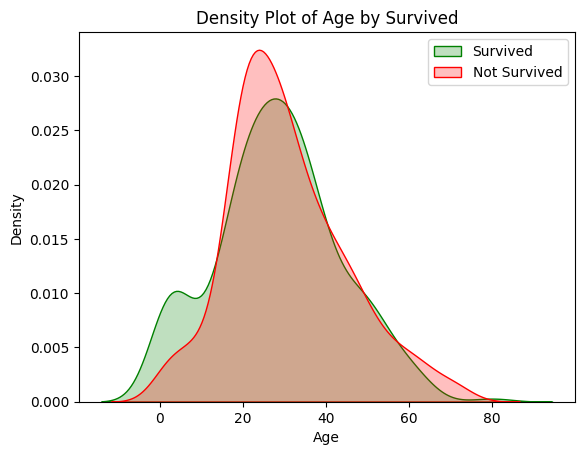

In [145]:
plot_distribution('Age','Survived')

From the diagram above, we observe that children and young people under 16 have a higher survival rate, while those between 20 and 30 years old generally have a lower survival rate. 📉 To better analyze this, we’ll categorize the age data into several bins: ['0-16', '16-20', '20-30', '30-40', '40-60', '60-100'].

Before we proceed with binning, we need to address missing values in the age column. 🛠️ We will fill these missing values with the average age of the title group to which the passenger belongs. This approach ensures that the missing data is handled in a way that maintains consistency within each title group.

In [85]:
title_age_median_train = train_data.groupby('Title')['Age'].median()
title_age_median_test = test_data.groupby('Title')['Age'].median()

X_train['Age'] = train_data.apply(
    lambda row: title_age_median_train[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
)

X_test['Age'] = test_data.apply(
    lambda row: title_age_median_test[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
)


In [86]:
bins_age = [0, 16,20,30,40,60,100] 
labels_age = ['0-16','16-20','20-30','30-40', '40-60','60-100']
X_train['Age_Category'] = pd.cut(X_train['Age'], bins=bins_age, labels=labels_age, right=True)
X_test['Age_Category'] = pd.cut(X_test['Age'], bins=bins_age, labels=labels_age, right=True)

In [87]:
X_train = pd.get_dummies(X_train, columns=['Age_Category'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Age_Category'], drop_first=False)

In [88]:
X_train.drop('Age',axis=1,inplace=True)
X_test.drop('Age',axis=1,inplace=True)

### 💵 Fare

In [89]:
X_test['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

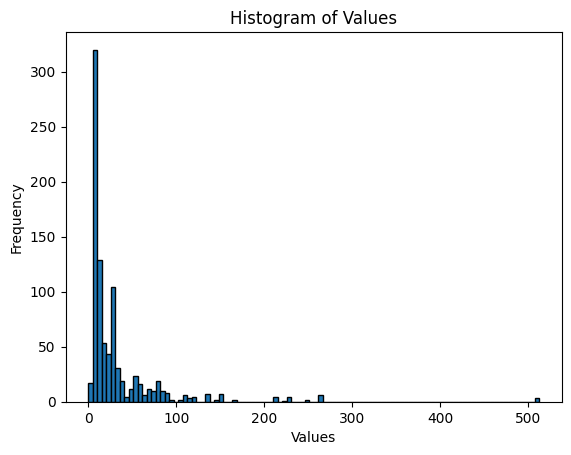

In [90]:
X_train['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

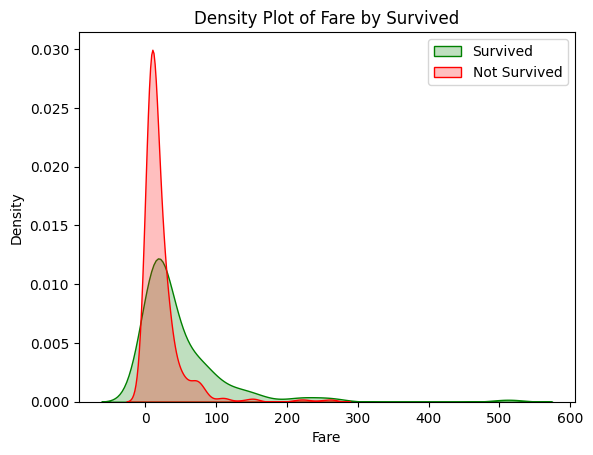

In [146]:
plot_distribution('Fare','Survived')

From the distribution above, we observe that tickets with a fare above 50 generally have a higher survival rate. To reflect this observation, we’ll divide the fare into the following groups:

In [91]:
bins_fare = [0, 10,50, 100, 200,600]
labels_fare = ['0-10','10-50', '50-100','100-200','200+']

X_train['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)
X_test['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)


In [92]:
X_train = pd.get_dummies(X_train, columns=['Fare_bin'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Fare_bin'], drop_first=False)

In [93]:
X_train.drop('Fare',axis=1,inplace=True)
X_test.drop('Fare',axis=1,inplace=True)

### 🛏️ Cabin

In the training set, only 204 rows contain cabin information. To incorporate this into our analysis, we first create a 'Cabin Indicator' to denote whether cabin information is available. Next, we add a new column, 'Deck', by extracting the first letter from the Cabin column. This letter may have an impact on the survival rate and could provide valuable insights.

In [94]:
X_train['Cabin_ind'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
X_test['Cabin_ind'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [95]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')  # 'M' for Missing
test_data['Deck'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')

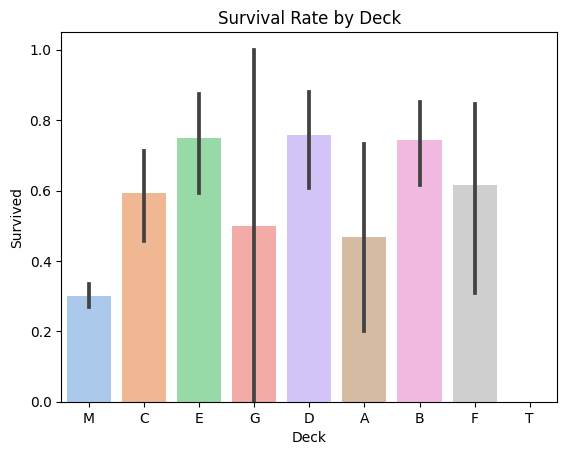

In [96]:
sns.barplot(x='Deck', y='Survived', data=train_data,palette='pastel')
plt.title('Survival Rate by Deck')
plt.show()

From above, we notice that in certain decks the survival rate is relatively higher than the others. Thus, we include this as a new column in our training feature.

In [97]:
X_train['Deck'] = train_data['Deck']
X_test['Deck'] = test_data['Deck']

In [98]:
X_train = pd.get_dummies(X_train, columns=['Deck'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Deck'], drop_first=False)

In [99]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Pclass               891 non-null    int64
 1   SibSp                891 non-null    int64
 2   Parch                891 non-null    int64
 3   Sex_female           891 non-null    uint8
 4   Sex_male             891 non-null    uint8
 5   Embarked_C           891 non-null    uint8
 6   Embarked_Q           891 non-null    uint8
 7   Embarked_S           891 non-null    uint8
 8   Title_Combined_Miss  891 non-null    uint8
 9   Title_Combined_Mr    891 non-null    uint8
 10  Title_Combined_Mrs   891 non-null    uint8
 11  Title_Combined_Rare  891 non-null    uint8
 12  Age_Category_0-16    891 non-null    uint8
 13  Age_Category_16-20   891 non-null    uint8
 14  Age_Category_20-30   891 non-null    uint8
 15  Age_Category_30-40   891 non-null    uint8
 16  Age_Category_40-60   891 n

### 🎫 Passenger Class

The survival rate is also associated with the class of the passenger. Generally, first-class passengers have a higher survival rate, followed by second-class passengers. The challenge is deciding whether to include this feature as a dummy variable or as a continuous value. To address this, we will test both approaches to determine which provides better results.

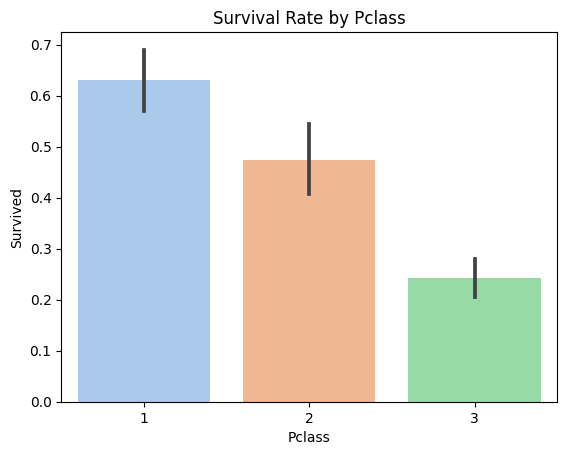

In [100]:
sns.barplot(x='Pclass', y='Survived', data=train_data,palette='pastel')
plt.title('Survival Rate by Pclass')
plt.show()

In [101]:
X_train_Pclass_dm = pd.get_dummies(X_train, columns=['Pclass'], drop_first=False)
X_test_Pclass_dm = pd.get_dummies(X_test, columns=['Pclass'], drop_first=False)

In [102]:
print("P_class as continous variables:")

P_class_models, P_class_result = train_RF(X_train, y_train)

print("P_class as dummy variables:")

P_class_models, P_class_result = train_RF(X_train_Pclass_dm, y_train)

P_class as continous variables:
    mean_test_score  std_test_score  \
12         0.835664        0.011555   
31         0.832847        0.013106   
42         0.831469        0.018233   
4          0.831459        0.012567   
10         0.831449        0.018444   

                                               params  rank_test_score  
12  {'n_estimators': 150, 'min_samples_split': 2, ...                1  
31  {'n_estimators': 50, 'min_samples_split': 2, '...                2  
42  {'n_estimators': 50, 'min_samples_split': 2, '...                3  
4   {'n_estimators': 150, 'min_samples_split': 2, ...                4  
10  {'n_estimators': 50, 'min_samples_split': 10, ...                5  
P_class as dummy variables:
    mean_test_score  std_test_score  \
35         0.832857        0.015754   
33         0.827253        0.010412   
26         0.827233        0.010730   
25         0.827233        0.009762   
47         0.827233        0.015868   

                                

From the training result, we see that having Pclass has dummy variables might benefit our prediction better.

In [103]:
X_train=X_train_Pclass_dm
X_test=X_test_Pclass_dm

### 👨‍👩‍👧‍👦 Family and Connections
Next, we focus on the features Parch (parents/children aboard) and SibSp (siblings/spouses aboard). These features provide insights into family connections, which could influence survival chances.

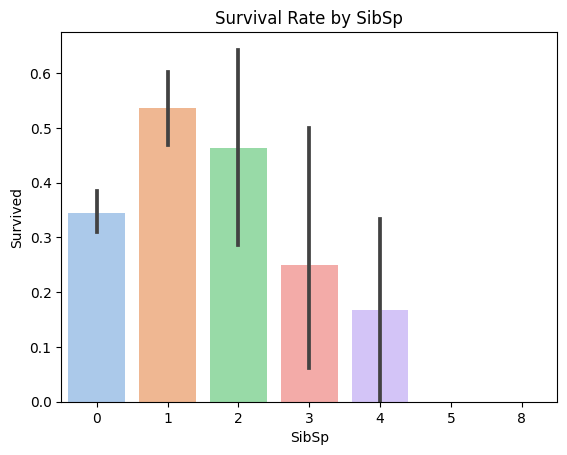

In [104]:
# Plot survival rate by SibSp
sns.barplot(x='SibSp', y='Survived', data=train_data,palette='pastel')
plt.title('Survival Rate by SibSp')
plt.show()

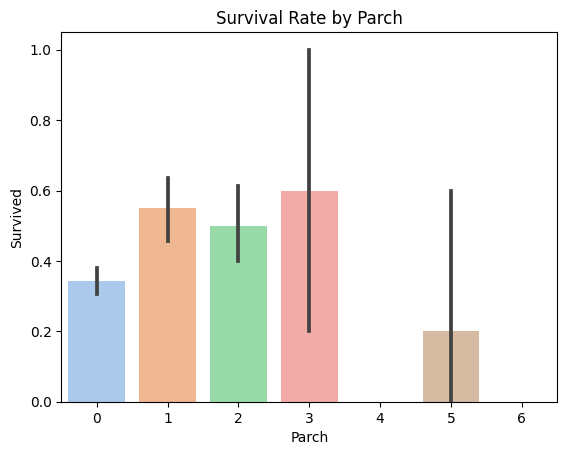

In [105]:
# Plot survival rate by Parch
sns.barplot(x='Parch', y='Survived', data=train_data,palette='pastel')
plt.title('Survival Rate by Parch')
plt.show()

It is hard to conclude whether having more relatives/friends on board will lead to higher survival rate. To Explore deeper in this part. Several other features have been created:

**Family Size: where the feature of SibSp and Parch's values have been added together to identify the family size**
****

In [106]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch']

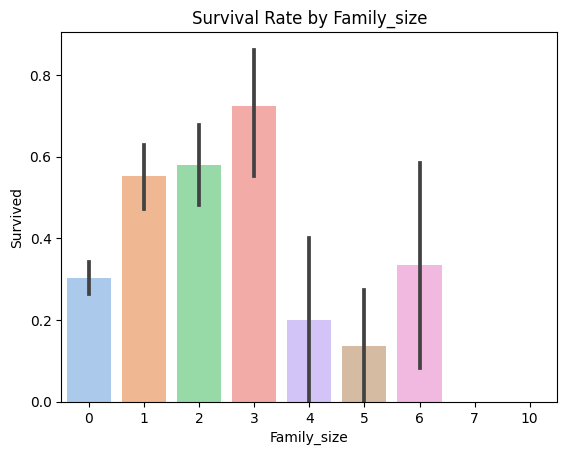

In [107]:
# Plot survival rate by Family Size
sns.barplot(x='Family_size', y='Survived', data=train_data,palette='pastel')
plt.title('Survival Rate by Family_size')
plt.show()

We observe that the survival rate increases as family size grows, up to a family size of 3. However, for families with 4 to 5 members, the survival rate tends to decrease. The survival rate improves for families with 6 or more members, though the variance within this group can be quite high.

To simplify the analysis, we group these family sizes into categories as follows:

In [108]:
bins_Familysize = [0,1,3,5,10]
labels_Familysize = ['solo', 'Small','Medium','Large']

X_train['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)
X_test['Familysize_Group'] = pd.cut(test_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)


In [109]:
X_train = pd.get_dummies(X_train, columns=['Familysize_Group'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Familysize_Group'], drop_first=False)

After adding the new feature, we need to decide whether to keep the original Parch and SibSp features. To determine which features to include, we will build and test the following models. 

In [110]:
ParchSibSp_asDm_X_train=pd.get_dummies(X_train, columns=['Parch','SibSp'], drop_first=False)
ParchSibSp_asDm_X_test=pd.get_dummies(X_test, columns=['Parch','SibSp'], drop_first=False)

In [111]:
NoFamilysize_X_train=X_train.drop(columns=['Familysize_Group_Small','Familysize_Group_Medium','Familysize_Group_Large'])
NoFamilysize_X_test=X_test.drop(columns=['Familysize_Group_Small','Familysize_Group_Medium','Familysize_Group_Large'])

In [112]:
NoParchSibSp_X_train=X_train.drop(columns=['Parch','SibSp'])
NoParchSibSp_X_test=X_test.drop(columns=['Parch','SibSp'])

In [113]:
print("Keep Family_size and Parch/SibSp:")

Family_AllIncluded, result = train_RF(X_train, y_train)

print("Keep Family_size and Parch/SibSp as dummies:")

Family_AllIncludeddm, result = train_RF(ParchSibSp_asDm_X_train, y_train)

print("No family size:")

NoFamilysize_Included, result = train_RF(NoFamilysize_X_train, y_train)

print("No Parents/Siblings info:")
NoParchsib_Included,result = train_RF(NoParchSibSp_X_train, y_train)


Keep Family_size and Parch/SibSp:
    mean_test_score  std_test_score  \
17         0.831459        0.012600   
45         0.831429        0.018083   
34         0.831419        0.018155   
61         0.831419        0.021181   
96         0.830021        0.023951   

                                               params  rank_test_score  
17  {'n_estimators': 50, 'min_samples_split': 2, '...                1  
45  {'n_estimators': 50, 'min_samples_split': 5, '...                2  
34  {'n_estimators': 100, 'min_samples_split': 5, ...                3  
61  {'n_estimators': 100, 'min_samples_split': 2, ...                3  
96  {'n_estimators': 100, 'min_samples_split': 10,...                5  
Keep Family_size and Parch/SibSp as dummies:
    mean_test_score  std_test_score  \
59         0.827214        0.014859   
44         0.825835        0.012211   
24         0.825835        0.009466   
81         0.825805        0.016653   
11         0.825805        0.018331   

             

From the results, we see that adding the Family Size feature provides additional impact beyond what is captured by Parch and SibSp. This suggests that the new feature offers valuable information that enhances the model's predictive power.



### 👩‍👧‍👦  Is Mother or not

A new variable is created to identify whether a passenger is a mother, based on her title and the Parch feature. 👩‍👧‍👦 This helps capture specific familial relationships that may influence survival chances.

In [114]:
def is_mother(row):
    return row['Title'] == 'Mrs' and row['Parch'] > 0

# Apply the function to create the 'Is_Mother' column
train_data['Is_Mother'] = train_data.apply(is_mother, axis=1).astype(int)
test_data['Is_Mother'] = test_data.apply(is_mother, axis=1).astype(int)


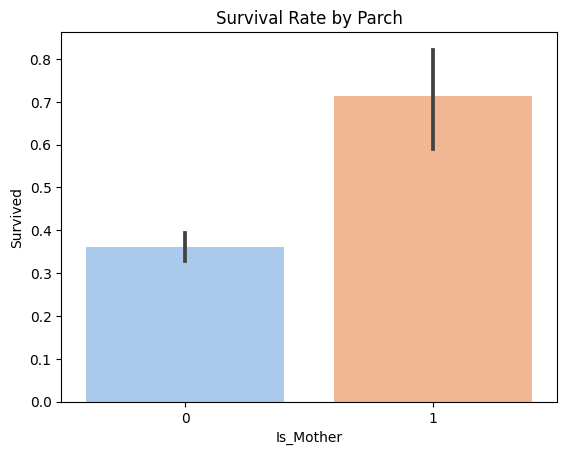

In [148]:
sns.barplot(x='Is_Mother', y='Survived', data=train_data,palette='pastel')
plt.title('Survival Rate by Parch')
plt.show()

From the bar chart, we can clearly see that mothers have a higher survival rate. Therefore, this new variable has been added to the training features to our training features.

In [115]:
X_train = pd.concat([X_train, train_data[['Is_Mother']]], axis=1)
X_test = pd.concat([X_test, test_data[['Is_Mother']]], axis=1)

### 🧩Ticket Number

In [116]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Interpreting ticket numbers can be challenging at first glance. However, from the data exploration it is not hard to find out that some passengers share the same ticket number.This suggests that they might have similar survival outcomes. To capture this potential connection, we create a new variable called 'Connected Survival':

For tickets shared by multiple passengers, the following code calculates the average survival rate and assigns a Connected_Survival value of 1 or 0 based on whether the average survival rate within the group is above or below 0.5. This new variable helps in capturing potential survival connections among passengers with the same ticket(across training and test set!).

In [149]:
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
combined_data['Is_Duplicate_Ticket'] = combined_data.duplicated(subset=['Ticket'], keep=False)
combined_data['Connected_Survival'] = 0.5 #We give a 0.5 survival rate to all passengers first.

for ticket, ticket_gp in combined_data.groupby('Ticket'):
    if len(ticket_gp) > 1:  # Only consider tickets with more than one passenger
        smean = ticket_gp['Survived'].mean()
        for ind, row in ticket_gp.iterrows():  # if the majority in the group survived, we assign connected survival= 1 to all the passengers share the ticket. 
            passID = row['PassengerId']
            if smean >= 0.5:
                combined_data.loc[combined_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif smean < 0.5:
                combined_data.loc[combined_data['PassengerId'] == passID, 'Connected_Survival'] = 0
    

In [118]:
train_data['Connected_Survival'] = combined_data['Connected_Survival'].iloc[:len(train_data)]
test_data['Connected_Survival'] = combined_data['Connected_Survival'].iloc[len(train_data):].reset_index(drop=True)

In [119]:
X_with_cs= pd.concat([X_train, train_data[['Connected_Survival']]], axis=1)

In [120]:
print("With Connected Survival:")

X_cs_models, C_result = train_RF(X_with_cs, y_train)

print("Without Connected Survival:")

X_wcs_models, C_result = train_RF(X_train, y_train)

With Connected Survival:
    mean_test_score  std_test_score  \
84         0.862366        0.021120   
10         0.862356        0.018704   
50         0.862346        0.016519   
11         0.862346        0.016519   
35         0.860967        0.020511   

                                               params  rank_test_score  
84  {'n_estimators': 50, 'min_samples_split': 10, ...                1  
10  {'n_estimators': 50, 'min_samples_split': 10, ...                2  
50  {'n_estimators': 50, 'min_samples_split': 5, '...                3  
11  {'n_estimators': 100, 'min_samples_split': 10,...                3  
35  {'n_estimators': 50, 'min_samples_split': 5, '...                5  
Without Connected Survival:
    mean_test_score  std_test_score  \
84         0.830001        0.022368   
28         0.827214        0.024442   
18         0.827204        0.023260   
99         0.825845        0.020552   
24         0.825835        0.012211   

                                       

This is a BIG JUMP! So we include this new feature into our model:

In [121]:
X_train['Connected_Survival'] = combined_data['Connected_Survival'].iloc[:len(train_data)]
X_test['Connected_Survival'] = combined_data['Connected_Survival'].iloc[len(train_data):].reset_index(drop=True)

### 📊 Finalising Training Set and Test Set

The final set is to verify that both the training and test datasets have the same number of columns. If there are missing columns(happens when creating dummy varaibles), we need to adjust the columns to make them compatible. This step is crucial for preparing the data to be fitted into the model later on.

In [122]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

In [123]:
missing_cols_test = train_columns - test_columns

In [124]:
missing_cols_test

{'Deck_T'}

In [125]:
for col in missing_cols_test:
    X_test[col] = 0

In [126]:
X_test = X_test[X_train.columns]

In [151]:
X_test.columns

Index(['SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Combined_Miss', 'Title_Combined_Mr',
       'Title_Combined_Mrs', 'Title_Combined_Rare', 'Age_Category_0-16',
       'Age_Category_16-20', 'Age_Category_20-30', 'Age_Category_30-40',
       'Age_Category_40-60', 'Age_Category_60-100', 'Fare_bin_0-10',
       'Fare_bin_10-50', 'Fare_bin_50-100', 'Fare_bin_100-200',
       'Fare_bin_200+', 'Cabin_ind', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Familysize_Group_solo',
       'Familysize_Group_Small', 'Familysize_Group_Medium',
       'Familysize_Group_Large', 'Is_Mother', 'Connected_Survival'],
      dtype='object')

In [152]:
X_train.columns

Index(['SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Combined_Miss', 'Title_Combined_Mr',
       'Title_Combined_Mrs', 'Title_Combined_Rare', 'Age_Category_0-16',
       'Age_Category_16-20', 'Age_Category_20-30', 'Age_Category_30-40',
       'Age_Category_40-60', 'Age_Category_60-100', 'Fare_bin_0-10',
       'Fare_bin_10-50', 'Fare_bin_50-100', 'Fare_bin_100-200',
       'Fare_bin_200+', 'Cabin_ind', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Familysize_Group_solo',
       'Familysize_Group_Small', 'Familysize_Group_Medium',
       'Familysize_Group_Large', 'Is_Mother', 'Connected_Survival'],
      dtype='object')

Now, both of them have same numbers of columns and is ready for the training stage.

## 🤖 Model Construction: Training Random Forest

This piece of code below is prepared for the previous feature engineering section:

In [129]:
def train_RF(X_train,y_train):

    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10, 15],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    randomized_search = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=44),
        param_distributions=param_grid,
        n_iter=100,  # Number of parameter settings sampled
        n_jobs=-1,
        scoring='accuracy',
        random_state=44,
        cv=5
        )

    randomized_search.fit(X_train_split, y_train_split)
    results = randomized_search.cv_results_

    results_df = pd.DataFrame({
        'mean_test_score': results['mean_test_score'],
        'std_test_score': results['std_test_score'],
        'params': results['params'],
        'rank_test_score': results['rank_test_score']
        })
    sorted_results_df = results_df.sort_values(by='rank_test_score')
    top_5_results = sorted_results_df.head(5)

    # Initialize an empty list to store the top models
    top_models = []
    result=[]
    # Loop through the top 5 results and build models using those parameters
    for idx, row in top_5_results.iterrows():
        params = row['params']
        model = RandomForestClassifier(**params)
        model.fit(X_train_split, y_train_split) 
        top_models.append(model)
        scores = cross_val_score(model, X_train_split, y_train_split, cv=5, scoring='accuracy')  # 5-fold cross-validation
        mean_accuracy = np.mean(scores)
        std_accuracy = np.std(scores)
        result.append((mean_accuracy,std_accuracy))
    print(sorted_results_df.head(5))
    return(top_models,result)


In the final modelling part, we increase our search grid and iteration numbers in order to find the best fit.

In [130]:
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150,125],           # Number of trees in the forest
    'max_depth': [5, 6, 7, 8, 9, 10],                # Maximum depth of the tree
    'max_features': ['sqrt', 'log2'],        # Number of features to consider for the best split
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,8],                   # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                       # Whether bootstrap samples are used when building trees
}

In [131]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [132]:
randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=44),
    param_distributions=param_grid,
    n_iter=1000, 
    n_jobs=-1,
    scoring='accuracy',
    random_state=44
)

randomized_search.fit(X_train_split, y_train_split)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=44),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100, 150,
                                                         125]},
                   random_state=44, scoring='accuracy')

In [133]:

results = randomized_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

     mean_test_score  std_test_score  \
864         0.866552        0.016211   
114         0.866552        0.016211   
769         0.866552        0.016211   
58          0.865173        0.019580   
14          0.865163        0.022888   
..               ...             ...   
252         0.846942        0.018285   
891         0.846932        0.013384   
923         0.846912        0.011226   
946         0.846912        0.014998   
313         0.846902        0.015747   

                                                params  rank_test_score  
864  {'n_estimators': 25, 'min_samples_split': 5, '...                1  
114  {'n_estimators': 25, 'min_samples_split': 2, '...                1  
769  {'n_estimators': 75, 'min_samples_split': 10, ...                1  
58   {'n_estimators': 50, 'min_samples_split': 5, '...                4  
14   {'n_estimators': 25, 'min_samples_split': 5, '...                5  
..                                                 ...              ...  
2

Based on the results from grid search, we select the top ten models that performed best. We then build a voting classifier using these top models. The voting classifier aggregates the predictions from each model, combining their strengths to improve overall performance and robustness. This approach helps in leveraging the collective power of multiple models to make more accurate predictions.

In [139]:
top_10_results = results_df.sort_values(by='rank_test_score').head(10)

# Initialize an empty list to store the top models
top_models = []

# Loop through the top 5 results and build models using those parameters
for idx, row in top_10_results.iterrows():
    params = row['params']
    model = RandomForestClassifier(**params)
    top_models.append(model)
    
print(top_models)

[RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=25), RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=8, n_estimators=25), RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=75), RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50), RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=25), RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=4,
                       n_estimators=25), RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10), RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=4,
                   

In [140]:
for model in top_models:
    model.fit(X_train_split, y_train_split)

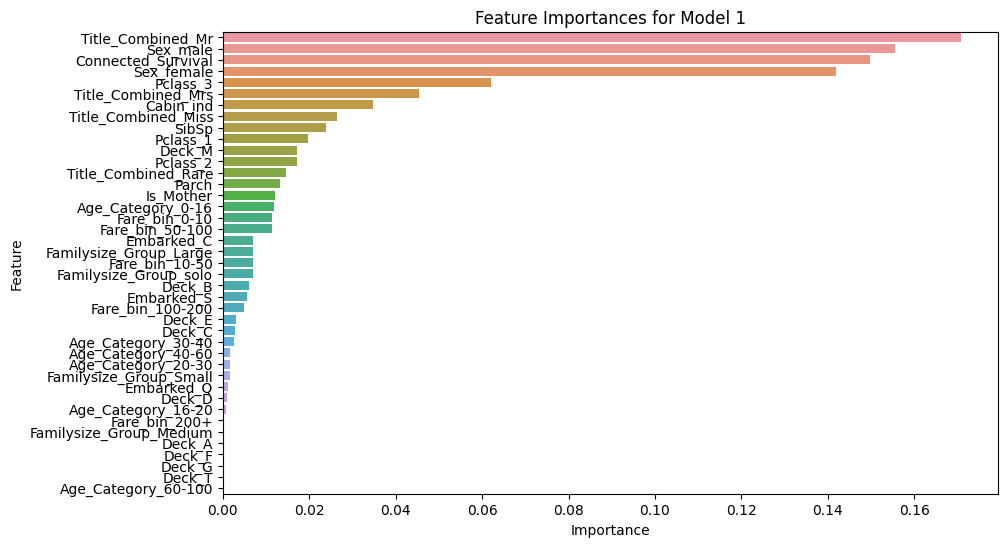

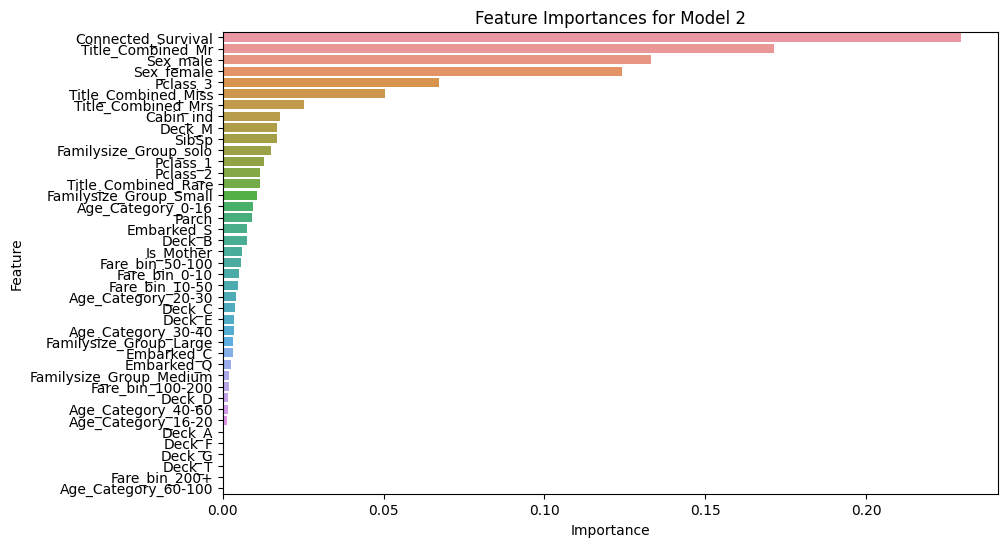

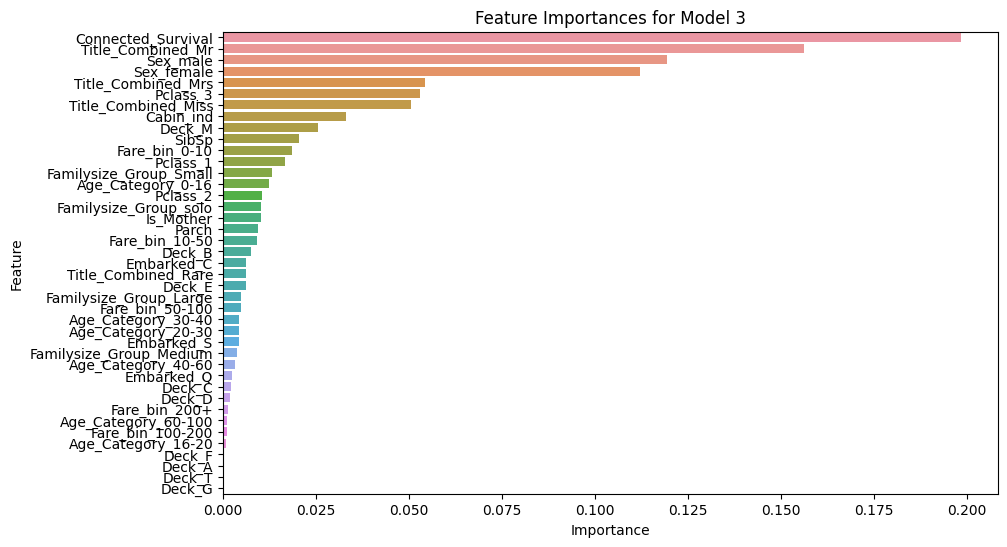

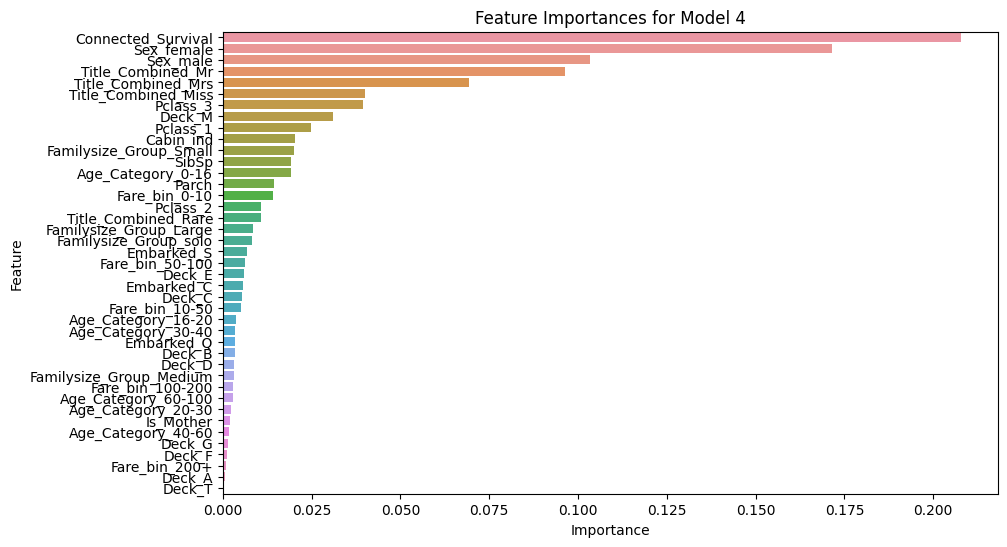

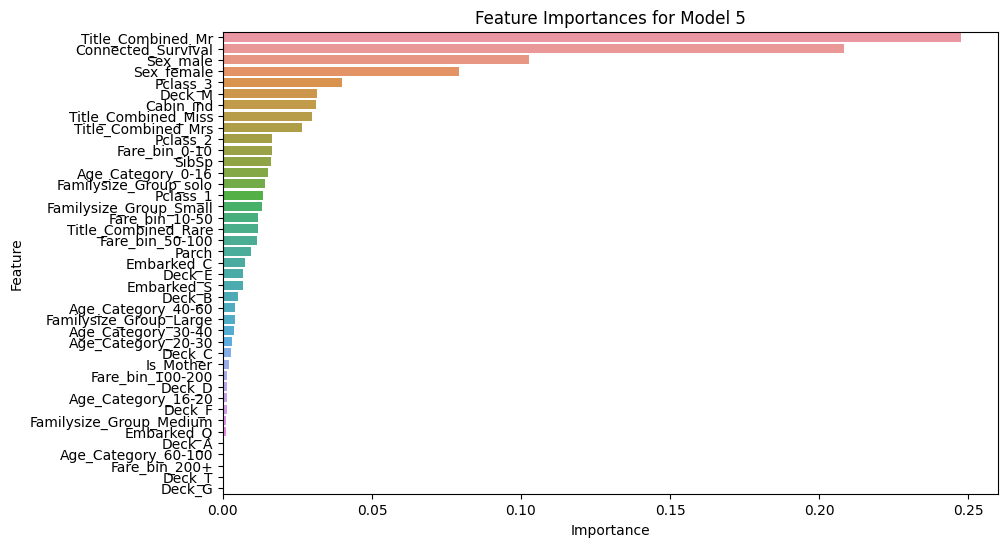

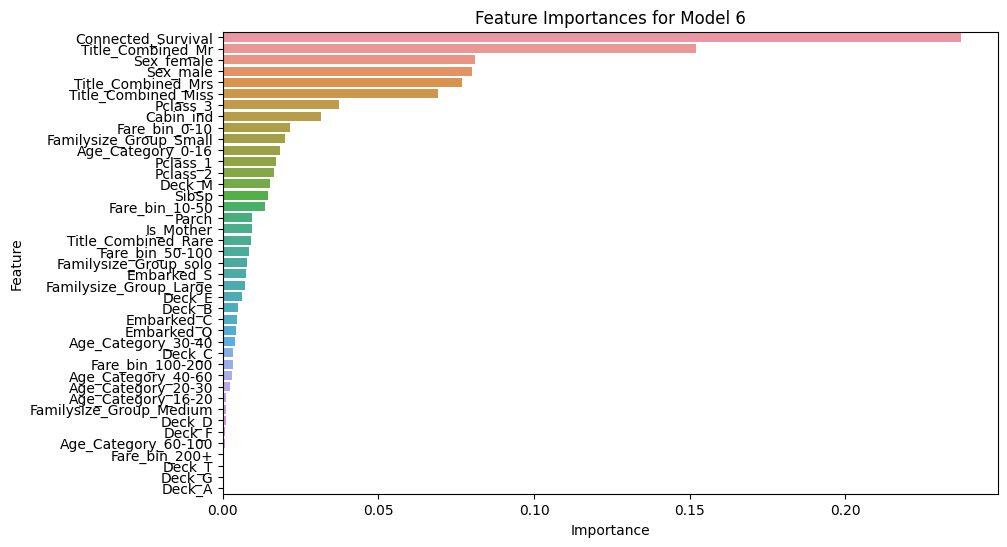

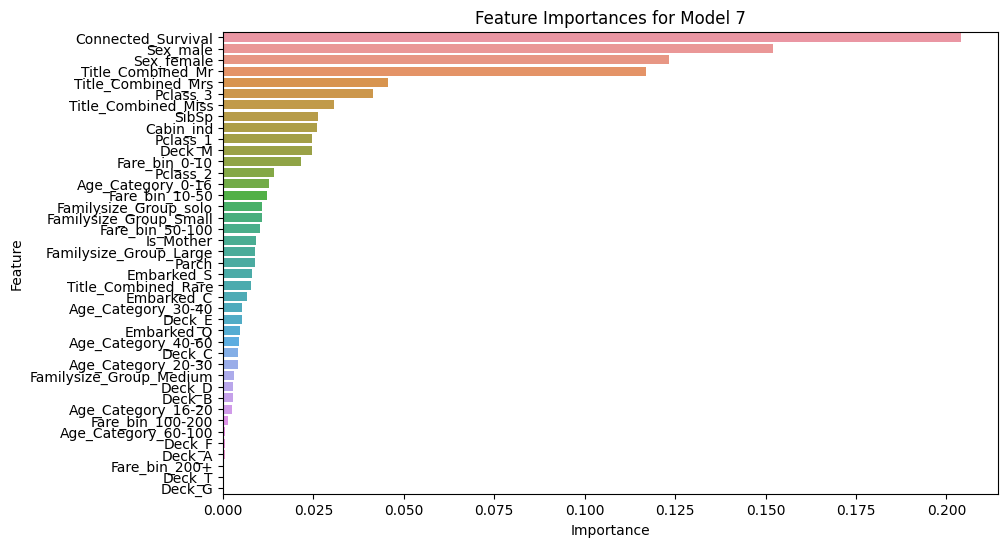

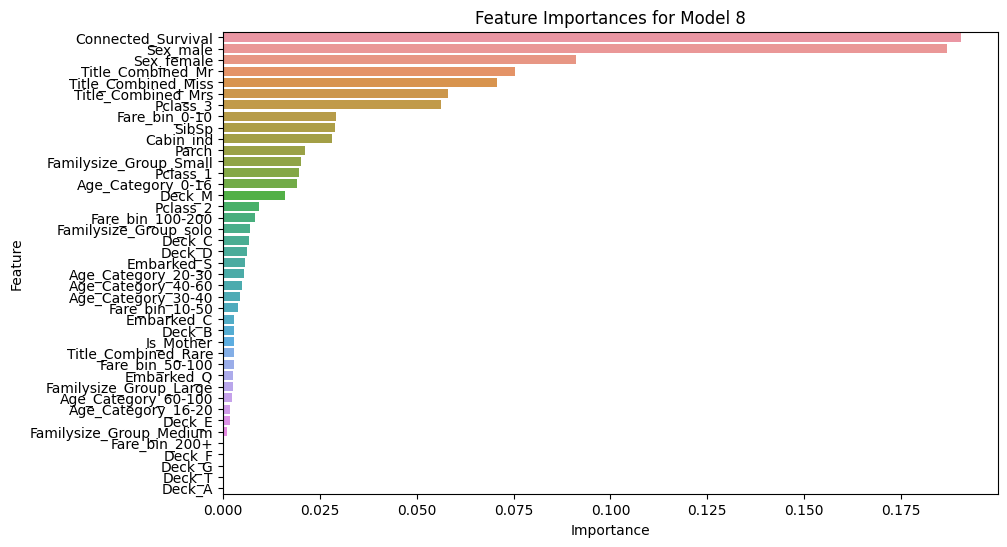

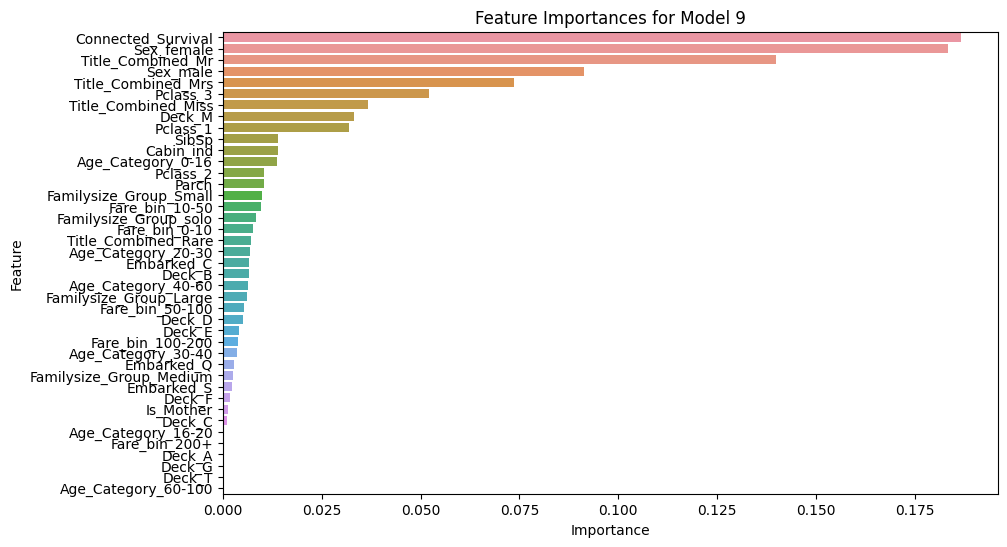

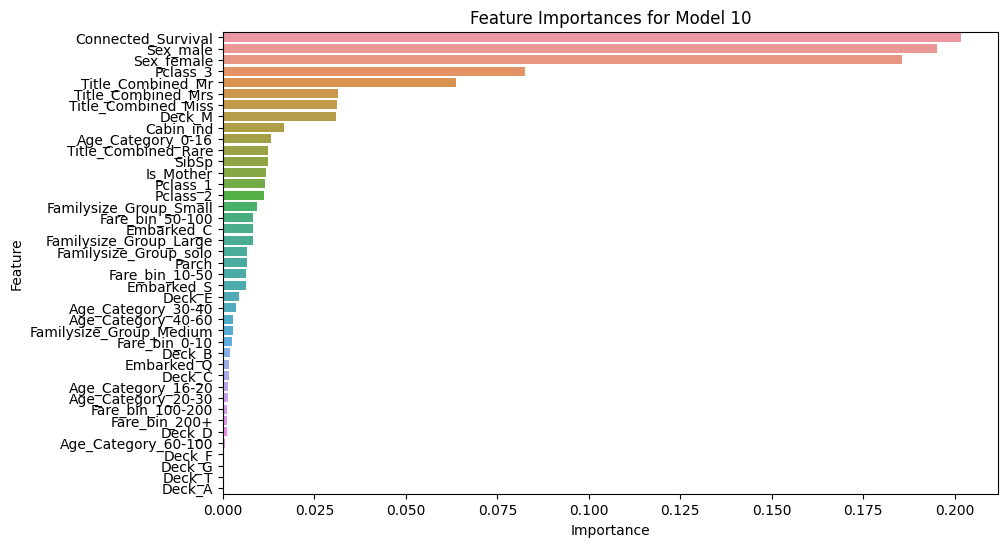

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature names
feature_names = X_train_split.columns

# Plotting feature importances for each model
for i, model in enumerate(top_models):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    importance_df = importance_df.sort_values(by='importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title(f'Feature Importances for Model {i+1}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

From the diagrams above, we observe that the ten Random Forest models have varying feature priorities and selections. This diversity helps in reducing model bias by capturing different aspects of the data. 

Now, we combine these models through a voting classifier helps in balancing out individual model biases:

In [142]:
from sklearn.ensemble import VotingClassifier

model_list = [(f'model_{i+1}', model) for i, model in enumerate(top_models)]
voting_clf = VotingClassifier(estimators=model_list, voting='soft')  
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('model_1',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=8,
                                                     min_samples_split=5,
                                                     n_estimators=25)),
                             ('model_2',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=8,
                                                     n_estimators=25)),
                             ('model_3',
                              RandomForestClassifier(max_depth=5,
                                                     max_features='l...
                              RandomForestClassifier(max_depth=6,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                                                     n_estimators=25)),
                             ('model_9',
                              RandomForestClassifier(max_depth=6,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     n_estimators=25)),
                             ('model_10',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=5,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=25))],
                 voting='soft')

Now, we write our final prediction into csv file and submit our result.

In [143]:
predictions = voting_clf.predict(X_test)

results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

results.to_csv('prediction_voting03.csv', index=False)

## Epilogue 🎉

The final test result achieved an accuracy of 80.861%. 

🚀 This model's performance placed me at rank 334 in the Kaggle competition🏆